In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Call command prompt for different metrics

## Functional

In [ ]:
# Cmd for kappa
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\kappa.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [ ]:
# Cmd for fractal dimension
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\fractaldimension.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [27]:
# Cmd for Simpson's Diversity Index
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\simpsons.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

In [79]:
# Cmd for fuzzy kappa
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\sendhelp.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

## Not working for various reasons

In [3]:
# Cmd for kappa simulation
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\kappasimulation.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

In [7]:
# Cmd for fuzzy kappa simulation
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\fuzzykappasimulation.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

## Results not varied

In [ ]:
# Cmd for clumpiness
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\clumpiness.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [81]:
# Random file name that seems to work unlike some others
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\halp2.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

0

# Create Dataframes

In [5]:
def df_gen(dims=100):
    rows, cols = rowscols(dims)
    df = pd.DataFrame(index=rows, columns = cols)
    np.fill_diagonal(df.values, 1)
    return df

def rowscols(nrmaps):
    df_init = []
    for i in range(nrmaps):
        df_init.append('map' + str(i))
    return df_init, df_init

In [48]:
df_kappa = df_gen(100)
df_kappa.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map90,map91,map92,map93,map94,map95,map96,map97,map98,map99
map0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map3,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map5,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map6,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
map9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_clumpi = df_gen(5)
df_fractal = df_gen(5)
df_simpsons = df_gen(5)
df_5 = df_gen(5)
df_100 = df_gen(100)

## Process Kappa

In [66]:
#cleaner string management
for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'map' + str(i)
            map_two = 'map' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' kappa="')
                        loc_start = loc + len(' kappa="')
                        loc_end =  line.find('"', loc_start)
                        df_kappa.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_kappa.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [67]:
df_kappa = df_kappa.astype(float).round(decimals=3)
df_kappa.head(20)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map90,map91,map92,map93,map94,map95,map96,map97,map98,map99
map0,1.000,0.938,0.918,0.946,0.953,0.946,0.912,0.913,0.909,0.936,...,0.935,0.919,0.914,0.932,0.919,0.922,0.921,0.914,0.925,0.917
map1,0.938,1.000,0.963,0.983,0.939,0.983,0.957,0.955,0.951,0.935,...,0.924,0.966,0.960,0.952,0.959,0.947,0.966,0.955,0.968,0.962
map2,0.918,0.963,1.000,0.964,0.931,0.964,0.958,0.958,0.955,0.927,...,0.923,0.969,0.956,0.951,0.972,0.942,0.956,0.953,0.962,0.953
map3,0.946,0.983,0.964,1.000,0.938,1.000,0.958,0.960,0.951,0.926,...,0.919,0.958,0.956,0.955,0.958,0.943,0.968,0.956,0.969,0.962
map4,0.953,0.939,0.931,0.938,1.000,0.938,0.932,0.925,0.923,0.945,...,0.956,0.941,0.937,0.947,0.940,0.949,0.950,0.925,0.959,0.948
map5,0.946,0.983,0.964,1.000,0.938,1.000,0.958,0.960,0.951,0.926,...,0.919,0.958,0.956,0.955,0.958,0.943,0.968,0.956,0.969,0.962
map6,0.912,0.957,0.958,0.958,0.932,0.958,1.000,0.964,0.983,0.923,...,0.930,0.962,0.975,0.949,0.966,0.945,0.973,0.960,0.968,0.973
map7,0.913,0.955,0.958,0.960,0.925,0.960,0.964,1.000,0.957,0.920,...,0.906,0.950,0.950,0.967,0.954,0.938,0.965,0.981,0.960,0.965
map8,0.909,0.951,0.955,0.951,0.923,0.951,0.983,0.957,1.000,0.919,...,0.930,0.959,0.973,0.943,0.965,0.940,0.965,0.958,0.959,0.965
map9,0.936,0.935,0.927,0.926,0.945,0.926,0.923,0.920,0.919,1.000,...,0.945,0.935,0.934,0.939,0.926,0.955,0.923,0.921,0.929,0.920


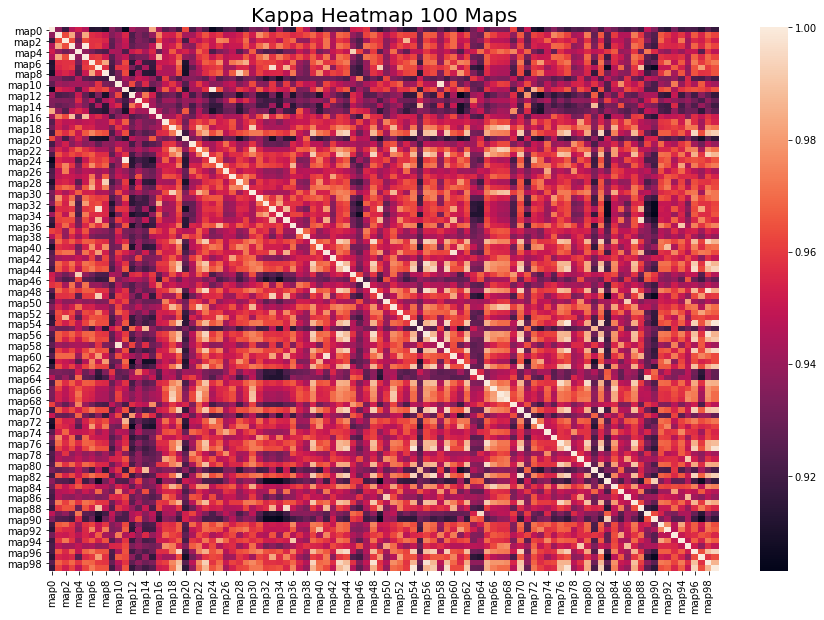

In [29]:
_ = plt.figure(figsize=(15,10)) 
_ = sns.heatmap(df_kappa)
_ = plt.title("Kappa Heatmap 100 Maps", fontsize =20)

# Process Kappa Location

In [36]:
df_loc = df_100

for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'map' + str(i)
            map_two = 'map' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' klocation="')
                        loc_start = loc + len(' klocation="')
                        loc_end =  line.find('"', loc_start)
                        df_loc.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_loc.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [38]:
df_loc = df_loc.astype(float).round(decimals=3)
df_loc.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map90,map91,map92,map93,map94,map95,map96,map97,map98,map99
map0,1.000,0.984,0.953,0.992,0.984,0.992,0.964,0.955,0.951,0.940,...,0.940,0.965,0.959,0.966,0.964,0.954,0.997,0.957,0.994,0.993
map1,0.984,1.000,0.975,0.985,0.975,0.985,0.968,0.970,0.965,0.977,...,0.971,0.967,0.966,0.964,0.964,0.963,0.997,0.970,0.991,0.995
map2,0.953,0.975,1.000,0.973,0.973,0.973,0.978,0.970,0.967,0.959,...,0.958,0.982,0.970,0.968,0.986,0.957,0.996,0.968,0.995,0.996
map3,0.992,0.985,0.973,1.000,0.974,1.000,0.969,0.974,0.964,0.967,...,0.963,0.962,0.961,0.966,0.963,0.957,0.998,0.972,0.993,0.996
map4,0.984,0.975,0.973,0.974,1.000,0.974,0.976,0.968,0.967,0.976,...,0.992,0.978,0.974,0.973,0.977,0.977,0.994,0.969,0.996,0.993
map5,0.992,0.985,0.973,1.000,0.974,1.000,0.969,0.974,0.964,0.967,...,0.963,0.962,0.961,0.966,0.963,0.957,0.998,0.972,0.993,0.996
map6,0.964,0.968,0.978,0.969,0.976,0.969,1.000,0.973,0.993,0.972,...,0.986,0.972,0.982,0.967,0.973,0.969,0.996,0.970,0.994,0.995
map7,0.955,0.970,0.970,0.974,0.968,0.974,0.973,1.000,0.958,0.959,...,0.951,0.965,0.963,0.985,0.966,0.962,0.997,0.984,0.995,0.997
map8,0.951,0.965,0.967,0.964,0.967,0.964,0.993,0.958,1.000,0.959,...,0.977,0.973,0.985,0.961,0.977,0.964,0.997,0.961,0.994,0.997
map9,0.940,0.977,0.959,0.967,0.976,0.967,0.972,0.959,0.959,1.000,...,0.953,0.978,0.977,0.971,0.969,0.987,0.996,0.961,0.994,0.993


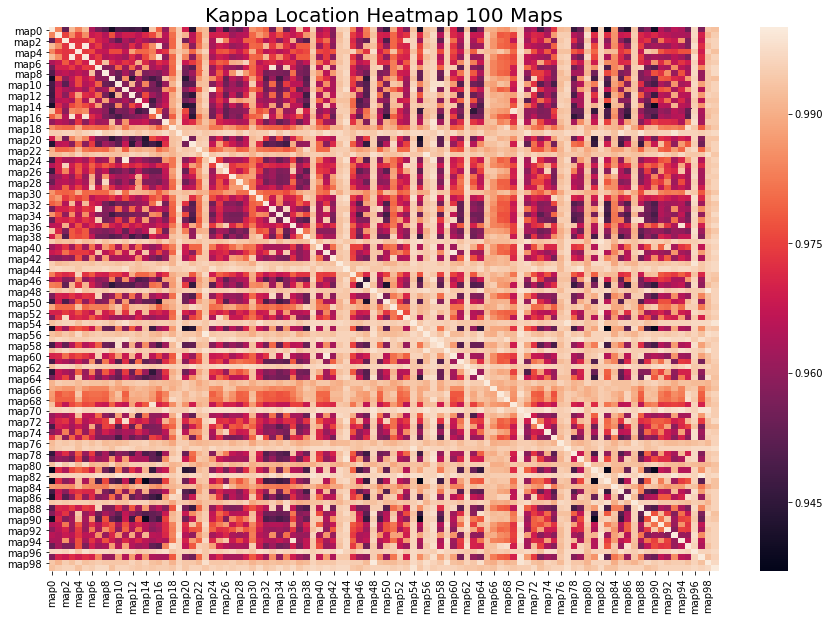

In [39]:
_ = plt.figure(figsize=(15,10)) 
_ = sns.heatmap(df_loc)
_ = plt.title("Kappa Location Heatmap 100 Maps", fontsize =20)

# Process Kappa Histo

In [40]:
df_histo = df_100

for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'map' + str(i)
            map_two = 'map' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' khisto="')
                        loc_start = loc + len(' khisto="')
                        loc_end =  line.find('"', loc_start)
                        df_histo.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_histo.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [41]:
df_histo = df_histo.astype(float).round(decimals=3)
df_histo.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map90,map91,map92,map93,map94,map95,map96,map97,map98,map99
map0,1.000,0.954,0.963,0.954,0.968,0.954,0.946,0.956,0.955,0.996,...,0.995,0.953,0.953,0.964,0.953,0.967,0.924,0.955,0.931,0.924
map1,0.954,1.000,0.988,0.998,0.963,0.998,0.989,0.985,0.985,0.957,...,0.952,0.998,0.994,0.987,0.995,0.984,0.970,0.985,0.976,0.966
map2,0.963,0.988,1.000,0.990,0.957,0.990,0.979,0.987,0.987,0.967,...,0.964,0.987,0.985,0.982,0.986,0.984,0.960,0.984,0.967,0.957
map3,0.954,0.998,0.990,1.000,0.963,1.000,0.989,0.986,0.986,0.957,...,0.954,0.996,0.995,0.989,0.995,0.986,0.970,0.984,0.976,0.966
map4,0.968,0.963,0.957,0.963,1.000,0.963,0.955,0.955,0.955,0.968,...,0.963,0.962,0.962,0.974,0.962,0.972,0.955,0.955,0.962,0.955
map5,0.954,0.998,0.990,1.000,0.963,1.000,0.989,0.986,0.986,0.957,...,0.954,0.996,0.995,0.989,0.995,0.986,0.970,0.984,0.976,0.966
map6,0.946,0.989,0.979,0.989,0.955,0.989,1.000,0.990,0.990,0.949,...,0.943,0.990,0.993,0.982,0.993,0.975,0.977,0.990,0.975,0.977
map7,0.956,0.985,0.987,0.986,0.955,0.986,0.990,1.000,0.999,0.959,...,0.953,0.985,0.987,0.982,0.987,0.975,0.968,0.996,0.965,0.968
map8,0.955,0.985,0.987,0.986,0.955,0.986,0.990,0.999,1.000,0.958,...,0.952,0.985,0.987,0.981,0.988,0.975,0.968,0.997,0.965,0.968
map9,0.996,0.957,0.967,0.957,0.968,0.957,0.949,0.959,0.958,1.000,...,0.991,0.956,0.956,0.967,0.956,0.967,0.927,0.958,0.934,0.927


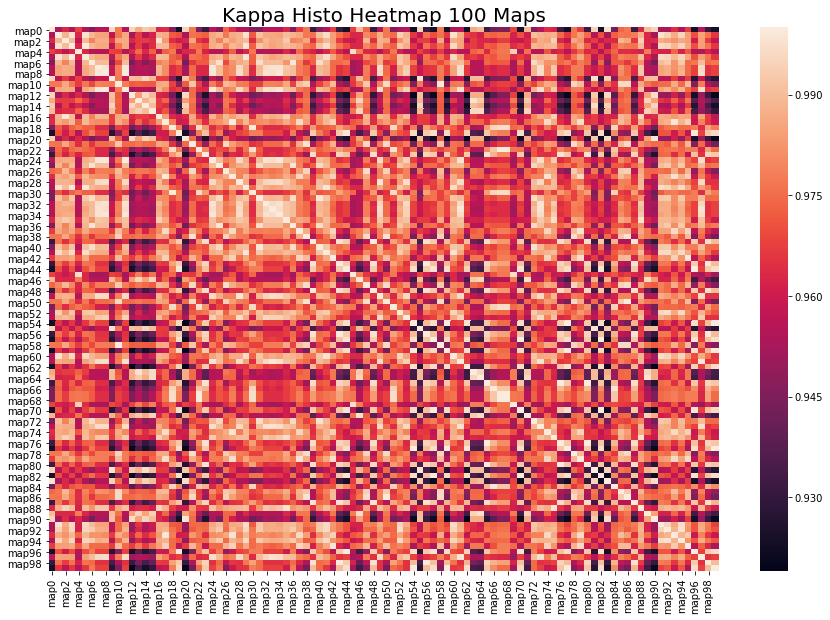

In [42]:
_ = plt.figure(figsize=(15,10)) 
_ = sns.heatmap(df_histo)
_ = plt.title("Kappa Histo Heatmap 100 Maps", fontsize =20)

# Process Fractal Dimension

In [53]:
#cleaner string management
fractal_list = []
for i in range(0, 100, 2):
    map_one = 'map' + str(i)
    map_two = 'map' + str(i + 1)
    comparison = 'C:/LUMOS/MCK/Output/fractaldimension/' + 'fractaldimension' + str(i) + '_' + str(i+1) + '.sts'
    with open(comparison, 'r') as file:
        for l, line in enumerate(file):
            if l == 3:
                #Find first value
                loc = line.find('overall_first="')
                loc_start = loc + len('overall_first="')
                loc_end =  line.find('"', loc_start)
                fractal_list.append(line[loc_start:loc_end])
                #Find second value
                loc2= line.find('overall_second="')
                loc_start2= loc2 + len('overall_second="')
                loc_end2= line.find('"', loc_start2)
                fractal_list.append(line[loc_start2:loc_end2])

In [30]:
map_list = []
for i in range(100):
    name = 'Map' +" " +  str(i)
    map_list.append(name)

In [17]:
#Use for testing
map_list2 = []
for i in range(6):
    name = 'Map' + " " +  str(i)
    map_list2.append(name)

In [72]:
df_fractal = pd.DataFrame(fractal_list, index = map_list, columns=['FractalDimension'])
df_fractal = df_fractal.astype(float).round(decimals=5)
df_fractal.head(10)

,FractalDimension
Map 0,1.46605
Map 1,1.62730
Map 2,1.62857
Map 3,1.46645
Map 4,1.63096
Map 5,1.46643
Map 6,1.46532
Map 7,1.62941
Map 8,1.62904
Map 9,1.46107


### From Fragstats manual:
Range of metric: 1 > FRAC < 2<br>
A fractal dimension greater than 1 for a 2-dimensional patch indicates a departure 
from Euclidean geometry (i.e., an increase in shape complexity). <br>
FRAC approaches 1 for shapes with very simple perimeters such as squares, and
approaches 2 for shapes with highly convoluted, plane-filling perimeters.<br>

# Process Simpson's Diversity Index

In [28]:
#cleaner string management
simpson_list = []
for i in range(0, 100, 2):
    map_one = 'map' + str(i)
    map_two = 'map' + str(i + 1)
    comparison = 'C:/LUMOS/MCK/Output/simpsons/' + 'simpsons' + str(i) + '_' + str(i+1) + '.sts'
    with open(comparison, 'r') as file:
        for l, line in enumerate(file):
            if l == 3:
                #Find first value
                loc = line.find('overall_first="')
                loc_start = loc + len('overall_first="')
                loc_end =  line.find('"', loc_start)
                simpson_list.append(line[loc_start:loc_end])
                #Find second value
                loc2= line.find('overall_second="')
                loc_start2= loc2 + len('overall_second="')
                loc_end2= line.find('"', loc_start2)
                simpson_list.append(line[loc_start2:loc_end2])

In [32]:
df_simpsons = pd.DataFrame(simpson_list, index = map_list, columns=["Simpson's Diversity Index"])
df_simpsons = df_simpsons.astype(float).round(decimals=5)
df_simpsons.head(10)

,Simpson's Diversity Index
Map 0,0.86811
Map 1,0.86293
Map 2,0.86402
Map 3,0.86362
Map 4,0.86650
Map 5,0.86362
Map 6,0.86132
Map 7,0.86135
Map 8,0.86142
Map 9,0.86695
